In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [2]:
df = pd.read_excel('costeiros_final.xlsx', index_col=0)

In [3]:
cols = list(df.columns)
cols

['ibge6',
 'Município',
 'Estado',
 'Ano de Referência',
 'Prestadores',
 'Serviços',
 'G06A - População urbana residente do(s) município(s) com abastecimento de água',
 'G06B - População urbana residente do(s) município(s) com esgotamento sanitário',
 'G12A - População total residente do(s) município(s) com abastecimento de água, segundo o IBGE',
 'G12B - População total residente do(s) município(s) com esgotamento sanitário, segundo o IBGE',
 'GE008 - Quantidade de Sedes municipais atendidas com abastecimento de água',
 'GE009 - Quantidade de Sedes municipais atendidas com esgotamento sanitário',
 'POP_TOT - População total do município (Fonte: IBGE):',
 'POP_URB - População urbana do município (Fonte: IBGE)',
 'GE201 - O órgão (prestador) é também o prestador - direto ou indireto - de outros serviços de saneamento básico no  município? (Antigo campo GE056)',
 'GE202 - Há empresa com contrato de DELEGAÇÃO (concessão ou contrato de programa) para algum ou todos os serviços de limpeza 

In [4]:
clus = df[['IN015_AE - Índice de coleta de esgoto', 
           'IN016_AE - Índice de tratamento de esgoto', 
           'IN023_AE - Índice de atendimento urbano de água',
           'IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água',
           'IN047_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com esgoto',
           'IN084_AE - Incidência das análises de coliformes totais fora do padrão',
           'IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município',
           'IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana',
           'IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana',
           'OS004 - Execução de limpeza de praias pelo agente público',
           'OS015 - Execução de limpeza de praias por empresas contratadas',
           'CS001 - Existe coleta seletiva no município?',
           'PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?',
           'PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?'
           ]]

In [5]:
clus.head()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,IN023_AE - Índice de atendimento urbano de água,IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água,IN047_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com esgoto,IN084_AE - Incidência das análises de coliformes totais fora do padrão,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,OS004 - Execução de limpeza de praias pelo agente público,OS015 - Execução de limpeza de praias por empresas contratadas,CS001 - Existe coleta seletiva no município?,"PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?",PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?
0,NaN,NaN,90.9,NaN,NaN,20.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.6,100.0,100.0,19.68,19.68,11.66,86.1,100.0,1.23,NaN,NaN,Não,Não,Sim
4,NaN,NaN,100.0,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
clus = clus.apply(lambda x: x.fillna(0) if x.dtype.kind in 'f' else x.fillna('Não'))

In [7]:
clus.head()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,IN023_AE - Índice de atendimento urbano de água,IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água,IN047_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com esgoto,IN084_AE - Incidência das análises de coliformes totais fora do padrão,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,OS004 - Execução de limpeza de praias pelo agente público,OS015 - Execução de limpeza de praias por empresas contratadas,CS001 - Existe coleta seletiva no município?,"PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?",PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?
0,0.0,0.0,90.9,0.00,0.00,20.18,0.0,0.0,0.00,Não,Não,Não,Não,Não
1,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,Não,Não,Não,Não,Não
2,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,Não,Não,Não,Não,Não
3,6.6,100.0,100.0,19.68,19.68,11.66,86.1,100.0,1.23,Não,Não,Não,Não,Sim
4,0.0,0.0,100.0,0.00,0.00,0.00,0.0,0.0,0.00,Não,Não,Não,Não,Não


In [8]:
clus = pd.get_dummies(clus, columns=['OS004 - Execução de limpeza de praias pelo agente público',
                                        'OS015 - Execução de limpeza de praias por empresas contratadas',
                                        'CS001 - Existe coleta seletiva no município?',
                                        'PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?',
                                        'PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?'])

In [9]:
clus.to_csv('clus.csv')

In [10]:
from sklearn.preprocessing import StandardScaler
X = clus.values
Clus = StandardScaler().fit_transform(X)
Clus

array([[-0.73039052, -0.80662981,  0.34895753, ..., -0.69180866,
         0.59153292, -0.59153292],
       [-0.73039052, -0.80662981, -2.82469497, ..., -0.69180866,
         0.59153292, -0.59153292],
       [-0.73039052, -0.80662981, -2.82469497, ..., -0.69180866,
         0.59153292, -0.59153292],
       ...,
       [ 1.58546555,  0.68242682,  0.66667191, ...,  1.44548639,
        -1.690523  ,  1.690523  ],
       [ 2.13355647,  1.32059394,  0.66667191, ...,  1.44548639,
        -1.690523  ,  1.690523  ],
       [ 0.45071103,  1.31676494, -0.17474751, ..., -0.69180866,
         0.59153292, -0.59153292]])

In [11]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 2 1 4 0 3 1 1 2 1 1 1 3 1 0 1 1 1 2 3 3 1 1 1 1 0 1 1 1 1 1 0 1 1 3
 4 1 1 3 1 1 1 3 1 1 1 1 2 0 0 0 0 1 1 1 1 1 3 1 3 2 2 2 2 3 3 3 0 0 1 2 4
 1 3 1 2 1 1 0 1 1 3 3 4 4 4 3 1 3 0 1 3 1 1 1 3 2 4 3 0 0 4 2 1 0 4 2 1 0
 4 1 0 0 1 4 4 1 2 2 1 3 1 1 3 1 3 4 2 3 1 2 2 3 1 3 1 1 3 3 1 3 3 3 3 2 2
 2 2 2 0 0 0 2 2 0 2 3 2 0 0 2 2 3 0 3 2 2 0 1 3 0 2 2 3 0 3 3 2 1 0 3 2 2
 1 2 1 1 0 3 1 4 2 4 4 4 4 2 4 4 2 4 3 3 3 4 3 4 3 4 4 0 4 0 4 2 0 2 1 0 0
 2 2 4 4 4 3 3 2 2 4 1 1 0 1 1 1 0 1 3 1 0 1 1 1 1 1 1 0 1 2 1 0 0 1 3 1 1
 1 1 0 1 1 1 1 1 1 3 4 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 2 1 1 0 1 0 1 0 1 4 0 0 1 2 0 1 0 3 1 1 1 2 0
 2 0 2 1 1 1 0 3 2 2 0 1 0 0 1 0 1 1 2 1 2 0 2 1 2 1 2 3 2 0 2 1 1 2 1 2 1
 2 3 4 1 0 3 1 1 0 1 1 1 2 1 3 1 3 4 4 3 4 3 4 0 4 3 3 4 2 0 4 4 4 4 3 4 0
 0 0 4 0 1 0 3 0 0 1 2 1 3 4 4 0 4 1 0 4 2 0 0 4 0 3 4 4 0 0 4 0 3 4 1 3 1
 0 1 0 4 2 0 1 1 0 1 1 1 0 4 3 3 1 1 3 0 4 1 1 1 0 2 0 0 1 4 2 4 1 0 3 2 2
 0 2 1 2 1 0 1 4 3 3 1 0 

In [12]:
clus["Clus_km"] = labels
clus.head(5)

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,IN023_AE - Índice de atendimento urbano de água,IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água,IN047_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com esgoto,IN084_AE - Incidência das análises de coliformes totais fora do padrão,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,OS004 - Execução de limpeza de praias pelo agente público_Não,OS004 - Execução de limpeza de praias pelo agente público_Sim,OS015 - Execução de limpeza de praias por empresas contratadas_Não,OS015 - Execução de limpeza de praias por empresas contratadas_Sim,CS001 - Existe coleta seletiva no município?_Não,CS001 - Existe coleta seletiva no município?_Sim,"PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Não","PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Sim",PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Não,PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Sim,Clus_km
0,0.0,0.0,90.9,0.00,0.00,20.18,0.0,0.0,0.00,1,0,1,0,1,0,1,0,1,0,1
1,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1,0,1,0,1,0,1,0,1,0,1
2,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,1,0,1,0,1,0,1,0,1,0,1
3,6.6,100.0,100.0,19.68,19.68,11.66,86.1,100.0,1.23,1,0,1,0,1,0,1,0,0,1,2
4,0.0,0.0,100.0,0.00,0.00,0.00,0.0,0.0,0.00,1,0,1,0,1,0,1,0,1,0,1


In [13]:
clus.groupby('Clus_km').mean()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,IN023_AE - Índice de atendimento urbano de água,IN024_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com água,IN047_AE - Índice de atendimento urbano de esgoto referido aos municípios atendidos com esgoto,IN084_AE - Incidência das análises de coliformes totais fora do padrão,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,OS004 - Execução de limpeza de praias pelo agente público_Não,OS004 - Execução de limpeza de praias pelo agente público_Sim,OS015 - Execução de limpeza de praias por empresas contratadas_Não,OS015 - Execução de limpeza de praias por empresas contratadas_Sim,CS001 - Existe coleta seletiva no município?_Não,CS001 - Existe coleta seletiva no município?_Sim,"PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Não","PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Sim",PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Não,PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Sim
Clus_km,,,,,,,,,,,,,,,,,,,
0,2.637850,0.576950,81.160500,2.609850,2.609850,6.974500,76.220000,97.246200,1.073050,0.930000,0.070000,0.965000,0.035000,0.740000,0.260000,0.510000,0.490000,0.630000,0.370000
1,0.735511,0.227111,67.151111,0.631911,0.631911,7.705244,0.081644,0.310756,0.003556,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.995556,0.004444
2,29.762783,97.374087,85.627826,27.022174,27.022174,2.773478,90.607391,98.440957,1.123043,0.930435,0.069565,0.843478,0.156522,0.591304,0.408696,0.452174,0.547826,0.565217,0.434783
3,47.946768,87.834646,88.066667,47.361515,47.361515,3.169899,0.376263,0.273030,0.011111,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
4,80.180083,72.384959,95.710744,82.798347,82.798347,1.841405,89.879917,99.194876,1.095372,0.876033,0.123967,0.851240,0.148760,0.338843,0.661157,0.297521,0.702479,0.404959,0.595041


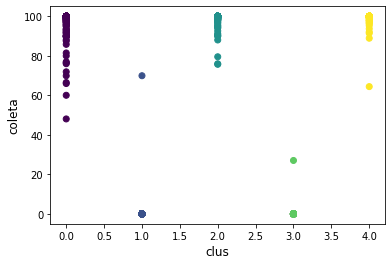

In [14]:

plt.scatter(clus['Clus_km'], clus['IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana'], c=clus['Clus_km'])
plt.xlabel('clus', fontsize=12)
plt.ylabel('coleta', fontsize=12)

plt.show()

In [15]:
clus_san = clus[['IN015_AE - Índice de coleta de esgoto', 
           'IN016_AE - Índice de tratamento de esgoto']]

In [16]:
X_san = clus_san.values
Clus_san = StandardScaler().fit_transform(X_san)
Clus_san

array([[-0.73039052, -0.80662981],
       [-0.73039052, -0.80662981],
       [-0.73039052, -0.80662981],
       ...,
       [ 1.58546555,  0.68242682],
       [ 2.13355647,  1.32059394],
       [ 0.45071103,  1.31676494]])

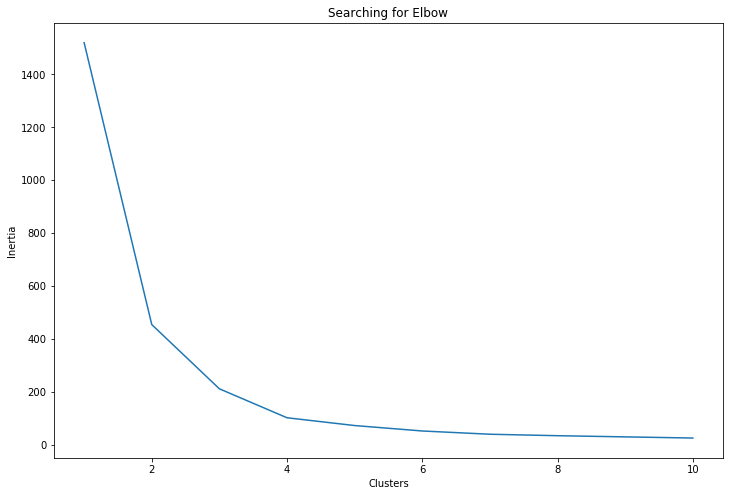

In [17]:
import seaborn as sns
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(Clus_san)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


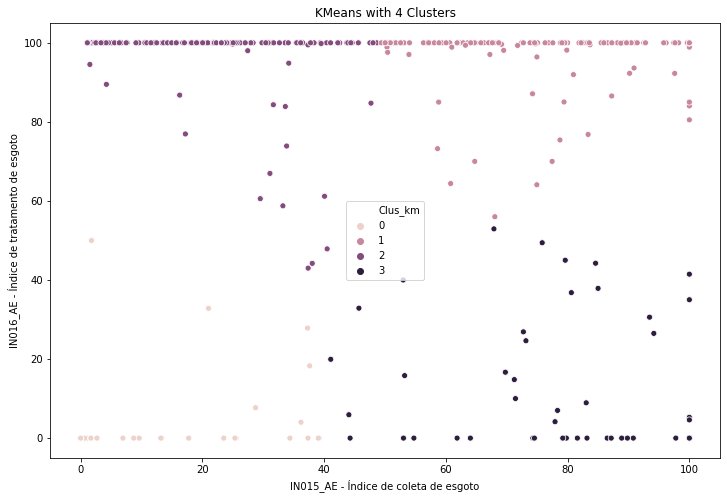

In [18]:
clusterNum = 4
k_means_san = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means_san.fit(Clus_san)
labels = k_means_san.labels_
clus_san["Clus_km"] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(clus_san['IN015_AE - Índice de coleta de esgoto'], clus_san['IN016_AE - Índice de tratamento de esgoto'], hue=clus_san['Clus_km'])
plt.title('KMeans with 4 Clusters')
plt.show()

In [19]:
clus_san.head()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,Clus_km
0,0.0,0.0,0
1,0.0,0.0,0
2,0.0,0.0,0
3,6.6,100.0,2
4,0.0,0.0,0


In [20]:
clus_san.groupby('Clus_km').mean()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto
Clus_km,,
0,1.141283,0.334062
1,75.750350,97.145874
2,22.358014,96.910548
3,79.745000,12.745600


In [21]:
clus_res = clus[['IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município',
           'IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana',
           'IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana']]

In [22]:
X_res = clus_res.values
Clus_res = StandardScaler().fit_transform(X_res)
Clus_res

array([[-1.09711069, -1.15957037, -0.90595937],
       [-1.09711069, -1.15957037, -0.90595937],
       [-1.09711069, -1.15957037, -0.90595937],
       ...,
       [ 1.14558571,  0.89614265,  0.36109547],
       [ 1.18135766,  0.89614265,  0.37549383],
       [-1.09711069, -1.15957037, -0.90595937]])

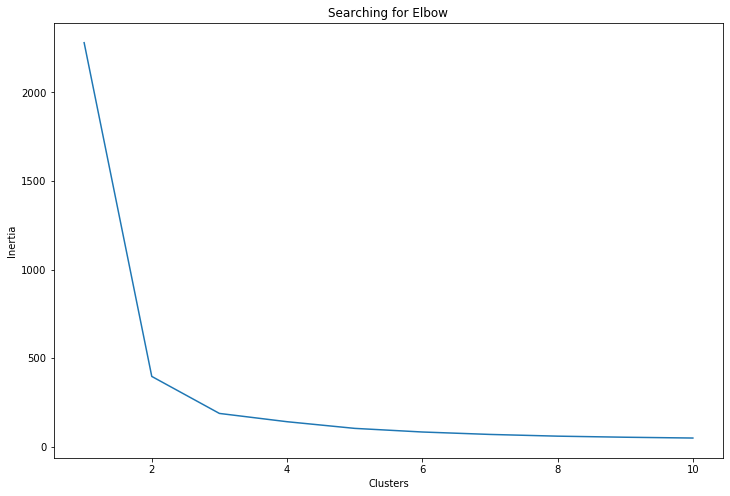

In [23]:
import seaborn as sns
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(Clus_res)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


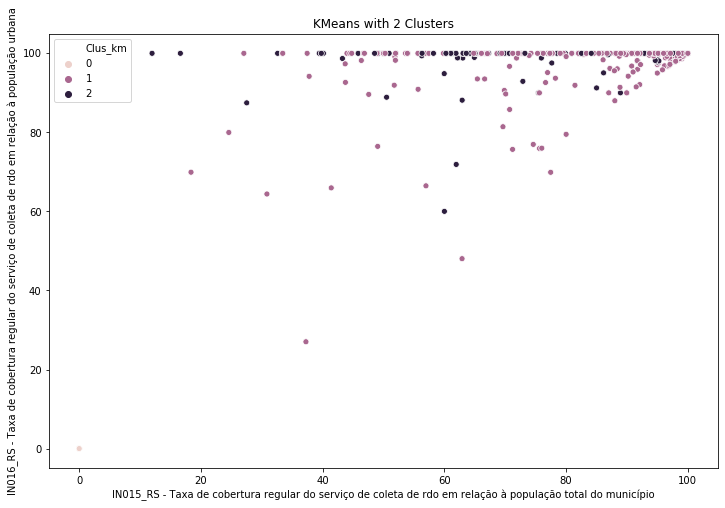

In [24]:
clusterNum = 3
k_means_res = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means_res.fit(Clus_res)
labels = k_means_res.labels_
clus_res["Clus_km"] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(clus_res['IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município'], 
                clus_res['IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana'], hue=clus_res['Clus_km'])
plt.title('KMeans with 2 Clusters')
plt.show()

In [25]:
clus_res.groupby('Clus_km').mean()

,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana
Clus_km,,,
0,0.000000,0.000000,0.000000
1,85.991040,97.678777,0.814679
2,76.359189,98.455135,1.908108


In [26]:
clus_df = pd.concat([clus_san, clus_res], axis=1)

In [27]:
clus_df.head()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,Clus_km,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,Clus_km
0,0.0,0.0,0,0.0,0.0,0.00,0
1,0.0,0.0,0,0.0,0.0,0.00,0
2,0.0,0.0,0,0.0,0.0,0.00,0
3,6.6,100.0,2,86.1,100.0,1.23,1
4,0.0,0.0,0,0.0,0.0,0.00,0


In [28]:
clus_limp = clus[['OS004 - Execução de limpeza de praias pelo agente público_Não',
                 'OS004 - Execução de limpeza de praias pelo agente público_Sim',
                 'OS015 - Execução de limpeza de praias por empresas contratadas_Não',
                 'OS015 - Execução de limpeza de praias por empresas contratadas_Sim']]

In [29]:
X_limp = clus_limp.values
Clus_limp = StandardScaler().fit_transform(X_limp)
Clus_limp

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.22622037, -0.22622037,  0.24489203, -0.24489203],
       [ 0.22622037, -0.22622037,  0.24489203, -0.24489203],
       [ 0.22622037, -0.22622037,  0.24489203, -0.24489203],
       ...,
       [ 0.22622037, -0.22622037,  0.24489203, -0.24489203],
       [ 0.22622037, -0.22622037,  0.24489203, -0.24489203],
       [ 0.22622037, -0.22622037,  0.24489203, -0.24489203]])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/e

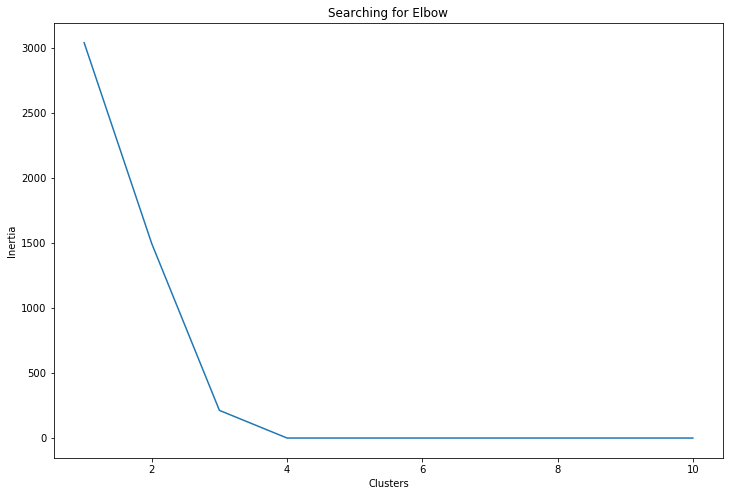

In [30]:
import seaborn as sns
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(Clus_limp)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [31]:
clusterNum = 4
k_means_limp = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means_limp.fit(Clus_limp)
labels = k_means_limp.labels_
clus_limp["Clus_km"] = labels

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
clus_limp.groupby('Clus_km').mean()

,OS004 - Execução de limpeza de praias pelo agente público_Não,OS004 - Execução de limpeza de praias pelo agente público_Sim,OS015 - Execução de limpeza de praias por empresas contratadas_Não,OS015 - Execução de limpeza de praias por empresas contratadas_Sim
Clus_km,,,,
0,1,0,1,0
1,1,0,0,1
2,0,1,1,0
3,0,1,0,1


In [33]:
clus_df = pd.concat([clus_df, clus_limp], axis=1)

In [34]:
clus_df.head()

,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,Clus_km,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,Clus_km,OS004 - Execução de limpeza de praias pelo agente público_Não,OS004 - Execução de limpeza de praias pelo agente público_Sim,OS015 - Execução de limpeza de praias por empresas contratadas_Não,OS015 - Execução de limpeza de praias por empresas contratadas_Sim,Clus_km
0,0.0,0.0,0,0.0,0.0,0.00,0,1,0,1,0,0
1,0.0,0.0,0,0.0,0.0,0.00,0,1,0,1,0,0
2,0.0,0.0,0,0.0,0.0,0.00,0,1,0,1,0,0
3,6.6,100.0,2,86.1,100.0,1.23,1,1,0,1,0,0
4,0.0,0.0,0,0.0,0.0,0.00,0,1,0,1,0,0


In [35]:
clus_plan = clus[['CS001 - Existe coleta seletiva no município?_Não', 
                  'CS001 - Existe coleta seletiva no município?_Sim', 
                  'PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Não', 
                  'PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Sim', 
                  'PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Não',
                  'PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Sim']]

In [36]:
X_plan = clus_plan.values
Clus_plan = StandardScaler().fit_transform(X_plan)
Clus_plan

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.55505811, -0.55505811,  0.69180866, -0.69180866,  0.59153292,
        -0.59153292],
       [ 0.55505811, -0.55505811,  0.69180866, -0.69180866,  0.59153292,
        -0.59153292],
       [ 0.55505811, -0.55505811,  0.69180866, -0.69180866,  0.59153292,
        -0.59153292],
       ...,
       [ 0.55505811, -0.55505811, -1.44548639,  1.44548639, -1.690523  ,
         1.690523  ],
       [-1.80161318,  1.80161318, -1.44548639,  1.44548639, -1.690523  ,
         1.690523  ],
       [ 0.55505811, -0.55505811,  0.69180866, -0.69180866,  0.59153292,
        -0.59153292]])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


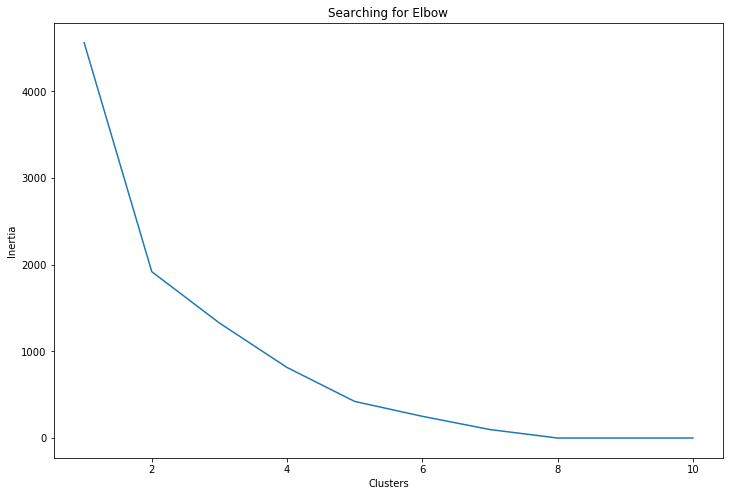

In [37]:
import seaborn as sns
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(Clus_plan)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [38]:
clusterNum = 5
k_means_plan = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 10)
k_means_plan.fit(Clus_plan)
labels = k_means_plan.labels_
clus_plan["Clus_km"] = labels

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [39]:
clus_plan.groupby('Clus_km').mean()

,CS001 - Existe coleta seletiva no município?_Não,CS001 - Existe coleta seletiva no município?_Sim,"PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Não","PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Sim",PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Não,PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Sim
Clus_km,,,,,,
0,1.0,0.0,1.000000,0.000000,1.0,0.0
1,0.0,1.0,0.107143,0.892857,0.0,1.0
2,1.0,0.0,0.329412,0.670588,0.0,1.0
3,0.0,1.0,0.477612,0.522388,1.0,0.0
4,1.0,0.0,0.000000,1.000000,1.0,0.0


In [40]:
clus_df = pd.concat([clus_df, clus_plan], axis=1)

In [41]:
nom = df[['ibge6', 'Município', 'Estado', 'CLUSTER']]

In [42]:
clus_df = pd.concat([nom, clus_df], axis=1)

In [43]:
clus_df.head()

,ibge6,Município,Estado,CLUSTER,IN015_AE - Índice de coleta de esgoto,IN016_AE - Índice de tratamento de esgoto,Clus_km,IN015_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população total do município,IN016_RS - Taxa de cobertura regular do serviço de coleta de rdo em relação à população urbana,IN021_RS - Massa coletada (rdo + rpu) per capita em relação à população urbana,...,OS015 - Execução de limpeza de praias por empresas contratadas_Não,OS015 - Execução de limpeza de praias por empresas contratadas_Sim,Clus_km,CS001 - Existe coleta seletiva no município?_Não,CS001 - Existe coleta seletiva no município?_Sim,"PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Não","PO028 - O município possui plano municipal de saneamento básico, elaborado nos termos estabelecidos na Lei 11.445/2007?_Sim",PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Não,PO048 - O Município possui Plano Municipal de Gestão Integrada de Resíduos Sólidos (PMGIRS) conforme a Lei nº 12.305/2010 que trata da Política Nacional de Resíduos Sólidos?_Sim,Clus_km
0,270020,Anadia,AL,NaN,0.0,0.0,0,0.0,0.0,0.00,...,1,0,0,1,0,1,0,1,0,0
1,270040,Atalaia,AL,NaN,0.0,0.0,0,0.0,0.0,0.00,...,1,0,0,1,0,1,0,1,0,0
2,270050,Barra de Santo Antônio,AL,D,0.0,0.0,0,0.0,0.0,0.00,...,1,0,0,1,0,1,0,1,0,0
3,270060,Barra de São Miguel,AL,C,6.6,100.0,2,86.1,100.0,1.23,...,1,0,0,1,0,1,0,0,1,2
4,270100,Boca da Mata,AL,D,0.0,0.0,0,0.0,0.0,0.00,...,1,0,0,1,0,1,0,1,0,0


In [44]:
clus_df.to_csv('cluster_knn.csv')